In [62]:
from scipy.io.matlab import loadmat
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import pyramid_gaussian
from skimage.feature import hog
import pickle
import time
import sys
sys.path.append("..")
from utils.detector import sliding_window

In [63]:
img = plt.imread(f'../raw/test_case/test_case0.jpg', cv2.IMREAD_UNCHANGED)

In [64]:
img.shape

(380, 676, 3)

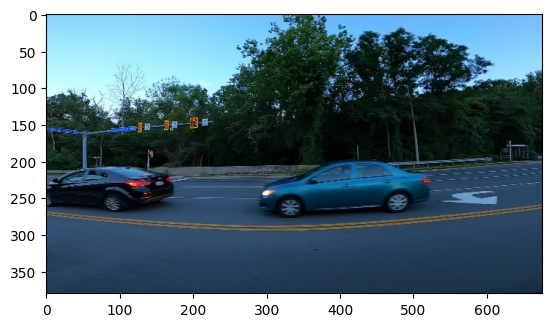

In [65]:
plt.imshow(img)

In [66]:
file = open("../data/svm_w(104,56)_or9_ppc(8, 8)_cpb(2, 2)_sgFalse_gmFalse_hnmTrue.pkl", "rb")
clf = pickle.load(file)
file.close()

In [67]:
# 1. Khai báo các tham số
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins
winSize = (104, 56)
blockSize = (block_size[1] * cell_size[1], block_size[0] * cell_size[0])
blockStride = (cell_size[1], cell_size[0])
print('Kích thước bức ảnh crop theo winSize (pixel): ', winSize)
print('Kích thước ảnh gốc: ', img.shape)
print('Kích thước của 1 block (pixel): ', blockSize)
print('Kích thước của block stride (pixel): ', blockStride)

hog = cv2.HOGDescriptor(
                        _winSize=winSize,
                        _blockSize=blockSize,
                        _blockStride=blockStride,
                        _signedGradient=False,
                        _cellSize=cell_size,
                        _nbins=nbins)
# Kích thước của lưới ô vuông.
n_cells = (winSize[0] // cell_size[0], winSize[1] // cell_size[1])
print('Kích thước lưới ô vuông (ô vuông): ', n_cells)

Kích thước bức ảnh crop theo winSize (pixel):  (104, 56)
Kích thước ảnh gốc:  (380, 676, 3)
Kích thước của 1 block (pixel):  (16, 16)
Kích thước của block stride (pixel):  (8, 8)
Kích thước lưới ô vuông (ô vuông):  (13, 7)


In [68]:
# hog.setSVMDetector(clf.coef_.reshape(-1))

In [69]:
hog_feats = hog.compute(img)\
               .reshape(-1, n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
                .transpose((0, 2, 1, 3, 4, 5)) 
print('Kích thước hog feature (h, w, block_size_h, block_size_w, nbins): ', hog_feats.shape)
x = (img.shape[0] - winSize[1]) // blockStride[1] + 1
y = (img.shape[1] - winSize[0]) // blockStride[0] + 1
assert hog_feats.shape[0] == x * y, f"{hog_feats.shape[0]} != {x * y}"
hog_feats = hog_feats.reshape(x * y, - 1)

Kích thước hog feature (h, w, block_size_h, block_size_w, nbins):  (2952, 12, 6, 2, 2, 9)


In [70]:
hog_feats[10].flatten()

array([0.05598365, 0.12445729, 0.20498432, ..., 0.19142933, 0.04219924,
       0.02220468], dtype=float32)

In [71]:
hog_feats = hog.compute(img[0:56, 80:184])\
               .reshape(-1, n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
                .transpose((0, 2, 1, 3, 4, 5)) 
hog_feats.flatten()

array([0.05591623, 0.11943076, 0.20394376, ..., 0.1706259 , 0.04178106,
       0.03080836], dtype=float32)

In [72]:
# class HOGDescriptorWrapper():
#     def __init__(self, window_size=(104, 56), orientations=9, signed_gradient=False, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
#         block_norm='L2-Hys', transform_sqrt=False, feature_vector=True) -> None:
#         self.descriptor = cv2.HOGDescriptor(_winSize=window_size,
#             _blockSize=blockSize,
#             _blockStride=blockStride,
#             _cellSize=cell_size,
#             _signedGradient=signed_gradient,
#             _nbins=nbins)
#     def sliding_window(img):
        
        